# Import all kind of stuff

In [1]:
import sys

import numpy as np
from numpy.typing import NDArray

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.ticker import MultipleLocator, AutoMinorLocator

from tqdm import tqdm

from scipy.special import jv

textwidth = 4.25279  # in
textheight = 6.85173 # in

local = "/Users/oliver/Documents/doctoral-thesis/.utilities/"
sys.path.append(local)

plt.style.use(f'{local}thesisstyle.mplstyle')

from thesislayout import get_figure, theory_layout

from cpd5 import get_color, get_colors, get_cmap, cmap_tinted_black_to_white
from cpd5 import (
    seeblau120,
    seeblau100,
    seeblau80,
    seeblau65,
    seeblau35,
    seeblau20,
)
seeblau = [seeblau120, seeblau100, seeblau65, seeblau35, seeblau20]
from cpd5 import (
    seegrau120,
    seegrau100,
    seegrau80,
    seegrau65,
    seegrau35,
    seegrau20,
)
from cpd5 import (
    peach100,
    petrol100,
    seegruen100,
    pinky100,
    karpfenblau100,
    bordeaux100,
)
seegrau = [seegrau120, seegrau100, seegrau65, seegrau35, seegrau20]
all_colors = [seegrau100, seeblau100, peach100,
    petrol100,
    seegruen100,
    pinky100,
    karpfenblau100,
    bordeaux100]

remote = "/Users/oliver/Documents/p5control-bluefors-evaluation/"
sys.path.append(remote)

from theory.utilities.constants import k_B_meV, G_0_muS, e, h
from theory.utilities.types import NDArray64

from theory.utilities.functions import bin_y_over_x, oversample

# theory
from theory.models.bcs import Delta_meV_of_T
from theory.models.bcs import N_of_E, f_of_E
from theory.models.bcs import get_I_nA as get_I_nA_bcs
from theory.models.tg import get_I_pat_nA as get_I_nA_tg

from theory.models.btk import AB_of_E, Z_of_tau
from theory.models.btk import get_I_nA as get_I_nA_btk
from theory.models.ha_sym import get_I_nA as get_I_nA_ha
from theory.models.fcs_pbar import get_I_nA as get_I_nA_fcs
from theory.models.utg import get_I_nA as get_I_nA_utg

from matplotlib_inline.backend_inline import InlineBackend
InlineBackend.print_figure_kwargs = {"bbox_inches": None, "pad_inches": 0.0}
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None, 'pad_inches': 0.0}
%config InlineBackend.figure_format = "retina"   # or "png"
%config InlineBackend.rc = {"figure.dpi": 200}   # choose a value you like

%matplotlib inline

In [2]:
from theory.models.bcs import T_C_K_of_Delta_meV

from theory.models.abs import (
    get_E_ABS,
    get_CPR_AB,
    get_CPR_ABS,
    get_CPR_KO1,
    get_CPR_KO2,
    get_rho,
    get_ICT_AB,
    get_ICT_ABS,
    get_ICT_KO1,
    get_ICT_KO2,
)

# btk - dos
for Gamma = 0.0, Gamma/Delta = 0.05

In [3]:
Delta_meV = 0.180
gamma_meV = 0.0
T_K = 0.0

tau = np.array([1.0, 0.66, 0.33, 0.1])
V_mV = np.linspace(0, 2.5 * Delta_meV, 501)

I = np.full((tau.shape[0], V_mV.shape[0]), np.nan)
dIdV = np.copy(I)
N_1e = np.copy(I)
N_2e = np.copy(I)
for i, tau_i in enumerate(tau):
    Z = Z_of_tau(tau_i)
    A, B = AB_of_E(
        E_meV=V_mV,
        Delta_meV=Delta_meV,
        Z=Z,
        gamma_meV=gamma_meV,
    )
    N_1e[i, :] = (1 - A - B) / tau_i
    N_2e[i, :] = 2 * A / tau_i

    I_nA = get_I_nA_btk(
        V_mV=V_mV,
        Delta_meV=Delta_meV,
        tau=tau_i,
        T_K=T_K,
        gamma_meV=gamma_meV,
    )[:, 0]
    dIdV[i, :] = np.gradient(I_nA, V_mV, axis=0) / G_0_muS / tau_i
    I[i, :] = I_nA / (G_0_muS * tau_i * Delta_meV)

/Users/oliver/Documents/p5control-bluefors-evaluation/theory/models/btk.py:36: RuntimeWarning: overflow encountered in square
  etta2 = np.square(etta)
/Users/oliver/Documents/p5control-bluefors-evaluation/theory/models/btk.py:39: RuntimeWarning: overflow encountered in square
  gamma2 = np.square(alpha + Z2 * diff) + np.square(etta * (2.0 * Z2 + 1.0))
/Users/oliver/Documents/p5control-bluefors-evaluation/theory/models/btk.py:41: RuntimeWarning: invalid value encountered in divide
  A = np.sqrt(np.abs((alpha2 + etta2) * (beta2 + etta2))) / gamma2
/Users/oliver/Documents/p5control-bluefors-evaluation/theory/models/btk.py:42: RuntimeWarning: overflow encountered in square
  term1 = np.square(diff * Z - 2.0 * etta)
/Users/oliver/Documents/p5control-bluefors-evaluation/theory/models/btk.py:44: RuntimeWarning: invalid value encountered in multiply
  B = (Z2 * (term1 + term2)) / gamma2
/Users/oliver/Documents/p5control-bluefors-evaluation/theory/models/btk.py:43: RuntimeWarning: overflow enc

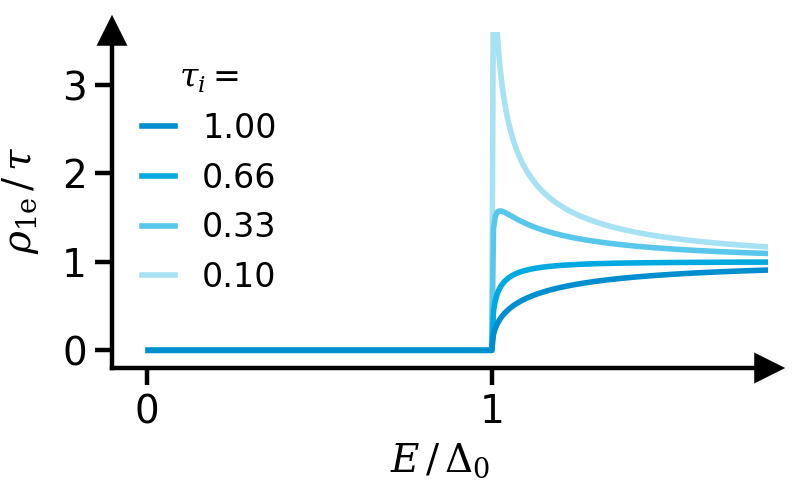

In [4]:
fig, ax = get_figure(figsize=(2, 1.2), subfigure=True)

for i, tau_i in enumerate(tau):
    ax.plot(
        V_mV / Delta_meV,
        N_1e[i, :],
        color=seeblau[i],
        zorder=10 - i,
        label=f"{tau_i:.2f}",
    )

ax.set_xlim(-0.1, 1.8)
ax.set_ylim(-0.2, 3.6)
ax.set_yticks([0, 1, 2, 3])
ax.set_xticks([0, 1])

ax.legend(
    title="$\\tau_i = $",
    handlelength=1.0,
    loc="upper left",
    frameon=False,
    fontsize=6,
    title_fontsize=6,
    ncols=1,
    columnspacing=1.0,
)

ylabel = "$\\rho_\\mathrm{1e}\\,/\\,\\tau$"
xlabel = "$E\\,/\\,\\Delta_0$"
title = "btk-1e-dos"

theory_layout(fig, ax, title, xlabel, ylabel)

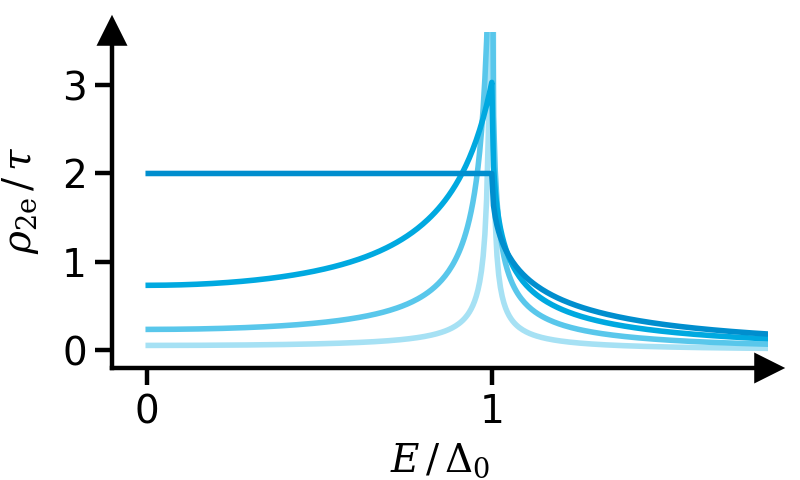

In [5]:
fig, ax = get_figure(figsize=(2, 1.2), subfigure=True)

for i, tau_i in enumerate(tau):
    ax.plot(
        V_mV / Delta_meV,
        N_2e[i, :],
        color=seeblau[i],
        zorder=10 - i,
        label=f"{tau_i:.1f}",
    )

ax.set_xlim(-0.1, 1.8)
ax.set_ylim(-0.2, 3.6)
ax.set_yticks([0, 1, 2, 3])
ax.set_xticks([0, 1])

ylabel = "$\\rho_\\mathrm{2e}\\,/\\,\\tau$"
xlabel = "$E\\,/\\,\\Delta_0$"
title = "btk-2e-dos"

theory_layout(fig, ax, title, xlabel, ylabel)

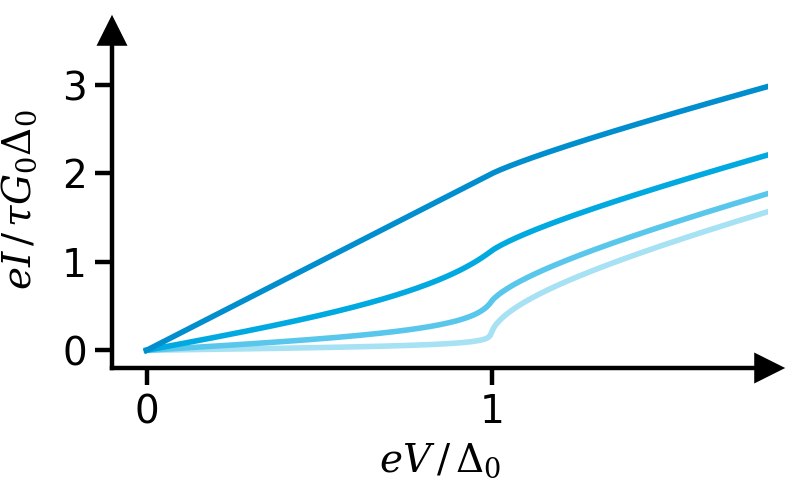

In [6]:
fig, ax = get_figure(figsize=(2, 1.2), subfigure=True)

for i, tau_i in enumerate(tau):
    ax.plot(
        V_mV / Delta_meV,
        I[i, :],
        color=seeblau[i],
        zorder=10 - i,
        label=f"{tau_i:.1f}",
    )

ax.set_xlim(-0.1, 1.8)
ax.set_ylim(-0.2, 3.6)
ax.set_yticks([0, 1, 2, 3])
ax.set_xticks([0, 1])

ylabel = "$eI\\,/\\,\\tau G_0\\Delta_0$"
xlabel = "$eV\\,/\\,\\Delta_0$"
title = "btk-iv"

theory_layout(fig, ax, title, xlabel, ylabel)

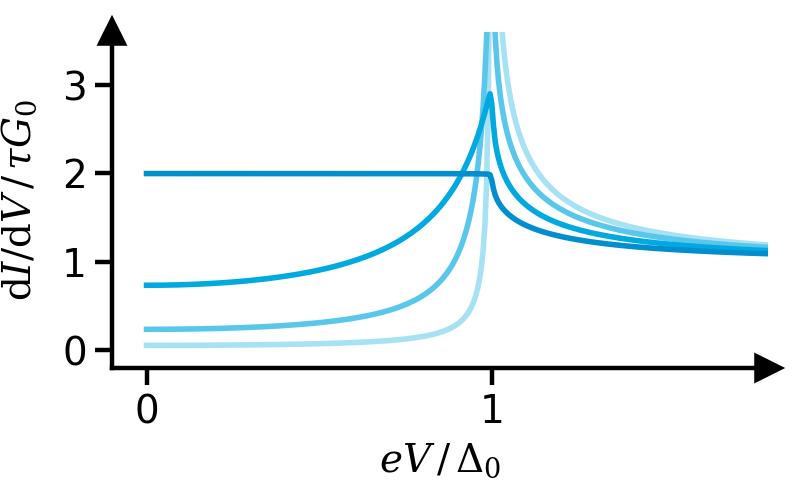

In [7]:
fig, ax = get_figure(figsize=(2, 1.2), subfigure=True)

for i, tau_i in enumerate(tau):
    ax.plot(
        V_mV / Delta_meV,
        dIdV[i, :],
        color=seeblau[i],
        zorder=10 - i,
        label=f"{tau_i:.1f}",
    )

ax.set_xlim(-0.1, 1.8)
ax.set_ylim(-0.2, 3.6)
ax.set_yticks([0, 1, 2, 3])
ax.set_xticks([0, 1])

ylabel = "$\\mathrm{d}I/\\mathrm{d}V\\,/\\,\\tau G_0$"
xlabel = "$eV\\,/\\,\\Delta_0$"
title = "btk-didv"

theory_layout(fig, ax, title, xlabel, ylabel)

# ABS

In [8]:
Delta_meV = 0.180
T_K = 0.0

tau = np.array([1.0, 0.95, 0.66, 0.33, 0.1])
phi = np.linspace(0, 2 * np.pi, 361)

E_abs = np.zeros((tau.shape[0], phi.shape[0]))
E_abs_meV = np.copy(E_abs)
I_abs = np.copy(E_abs)
I_abs_nA = np.copy(E_abs)

for i_tau, tau_i in enumerate(tau):
    E_abs[i_tau, :] = get_E_ABS(
        phi=phi,
        tau=tau_i,
    )
    I_abs[i_tau, :] = get_CPR_ABS(
        phi=phi,
        Delta_meV=Delta_meV,
        tau=tau_i,
        T_K=T_K,
    )

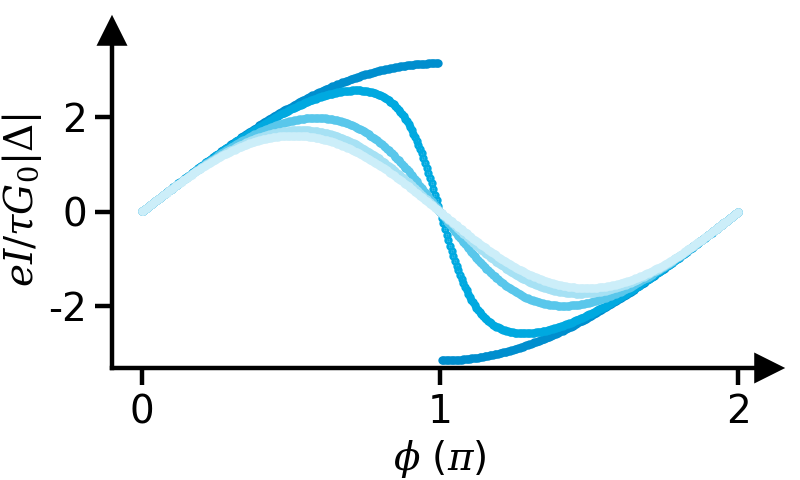

In [9]:
fig, ax = get_figure(figsize=(2, 1.2), subfigure=True)
for i, tau_i in enumerate(tau):
    plt.plot(phi / (np.pi), I_abs[i, :] / tau_i, ".", color=seeblau[i])

ax.set_xticks([0, 1, 2])
ax.set_ylim(-3.3, 3.8)

ylabel = "$eI / \\tau G_0 |\\Delta|$"
xlabel = "$\\phi$ ($\\pi$)"
title = "abs-Iphi"

theory_layout(fig, ax, title, xlabel, ylabel)

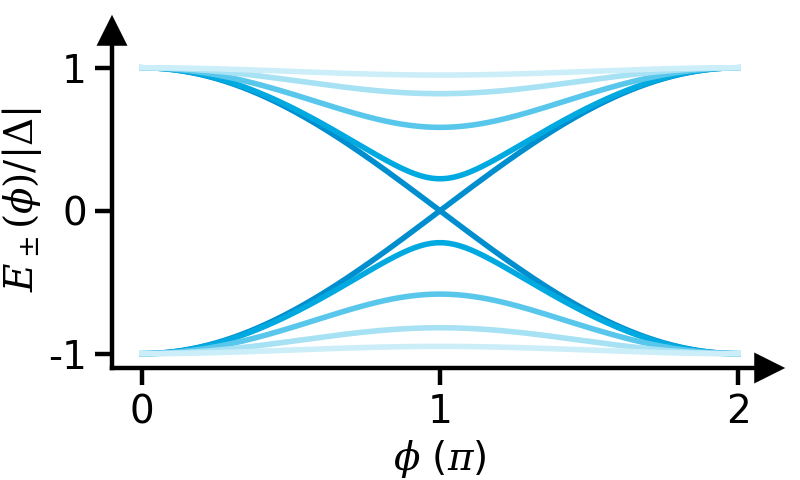

In [10]:
fig, ax = get_figure(figsize=(2, 1.2), subfigure=True)
for i, tau_i in enumerate(tau):
    ax.plot(phi / (np.pi), E_abs[i, :], color=seeblau[i])
    ax.plot(phi / (np.pi), -E_abs[i, :], color=seeblau[i])

ax.set_xticks([0, 1, 2])
ax.set_ylim(-1.1, 1.25)

ylabel = "$E_\\pm(\\phi)/|\\Delta|$"
xlabel = "$\\phi$ ($\\pi$)"
title = "abs-Ephi"

theory_layout(fig, ax, title, xlabel, ylabel)

# Multichannel Contact

In [11]:
tau = np.linspace(0, 1, 101)
phi = np.linspace(0, 1, 101)
phi *= 2 * np.pi

G_N = 1.0
T_K = 0.0
n_phi = 501

rho = get_rho(tau=tau, G_N=G_N)
CPR_AB = get_CPR_AB(phi=phi, Delta_meV=Delta_meV, G_N=G_N, T_K=T_K)
CPR_ABS = get_CPR_ABS(phi=phi, Delta_meV=Delta_meV, tau=G_N, T_K=T_K)
CPR_KO2 = get_CPR_KO2(phi=phi, Delta_meV=Delta_meV, G_N=G_N, T_K=T_K)
CPR_KO1 = get_CPR_KO1(phi=phi, Delta_meV=Delta_meV, G_N=G_N, T_K=T_K)

TC_K = T_C_K_of_Delta_meV(Delta_meV=Delta_meV)
T = np.linspace(0, 1, 101)
T_K = T * TC_K

I_C_AB = get_ICT_AB(T_K=T_K, Delta_meV=Delta_meV, G_N=G_N)
I_C_ABS = get_ICT_ABS(T_K=T_K, Delta_meV=Delta_meV, tau=G_N, n_phi=n_phi)
I_C_KO1 = get_ICT_KO1(T_K=T_K, Delta_meV=Delta_meV, G_N=G_N, n_phi=n_phi)
I_C_KO2 = get_ICT_KO2(T_K=T_K, Delta_meV=Delta_meV, G_N=G_N, n_phi=n_phi)

100%|██████████| 101/101 [00:33<00:00,  2.98it/s]


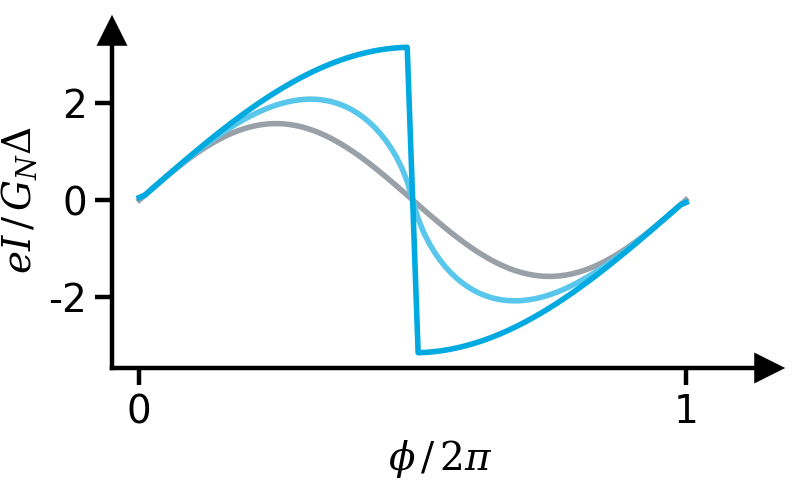

In [12]:
fig, ax = get_figure(figsize=(2.0, 1.2), subfigure=True)

ax.plot(phi / (2 * np.pi), CPR_AB, color=seegrau65, label="AB")
ax.plot(phi / (2 * np.pi), CPR_KO1, color=seeblau65, label="KO1")
ax.plot(phi / (2 * np.pi), CPR_KO2, color=seeblau100, label="KO2")

ax.set_xlim(-0.05, 1.15)
ax.set_xticks([0, 1])

ylabel = "$eI\\,/\\,G_N \\Delta$"
xlabel = "$\\phi\\,/\\,2\\pi$"
title = "ko-cpr"

theory_layout(fig, ax, title, xlabel, ylabel)

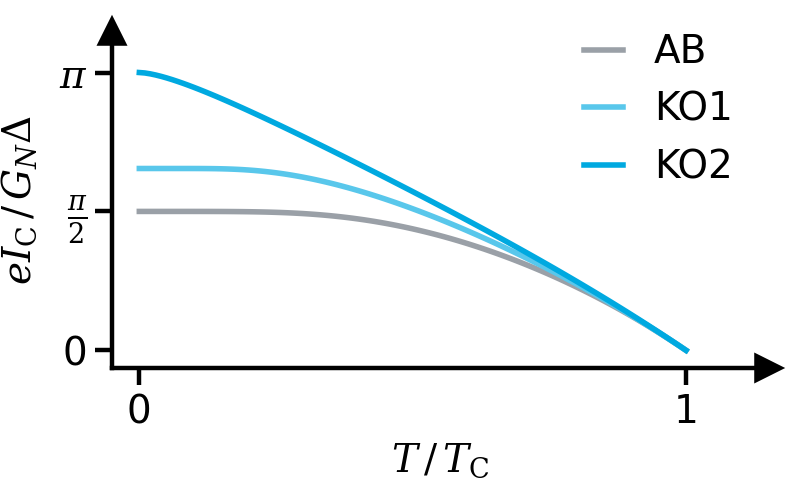

In [13]:
fig, ax = get_figure(figsize=(2.0, 1.2), subfigure=True)

ax.plot(T, I_C_AB, color=seegrau65, label="AB")
ax.plot(T, I_C_KO1, color=seeblau65, label="KO1")
ax.plot(T, I_C_KO2, color=seeblau100, label="KO2")

ax.legend()
ax.set_xlim(-0.05, 1.15)
ax.set_xticks([0, 1])
ax.set_ylim(-0.2, 3.6)
ax.set_yticks([0, np.pi / 2, np.pi], labels=["0", "$\\frac{\\pi}{2}$", "$\\pi$"])

ax.legend(
    handlelength=1.0,
    loc="upper right",
    frameon=False,
    fontsize=7,
    title_fontsize=7,
    ncols=1,
    columnspacing=1.0,
    bbox_to_anchor=(1.0, 1.1),
)

ylabel = "$eI_\\mathrm{C}\\,/\\,G_N \\Delta$"
xlabel = "$T\\,/\\,T_\\mathrm{C}$"
title = "ko-ic"

theory_layout(fig, ax, title, xlabel, ylabel)

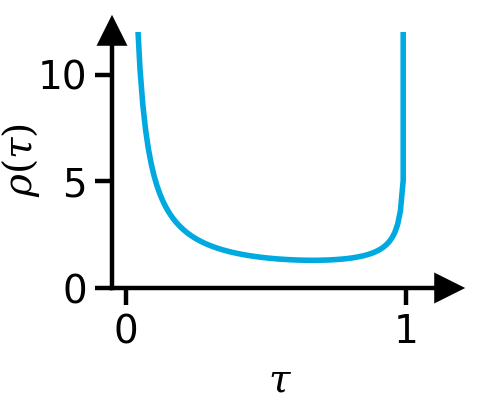

In [14]:
fig, ax = get_figure(figsize=(1.2, 1.0), subfigure=True)

ax.plot(tau, rho, color=seeblau100)

ax.set_ylim(0, 12)
ax.set_yticks([0, 5, 10])
ax.set_xlim(-0.05, 1.15)
ax.set_xticks([0, 1])

ylabel = "$\\rho(\\tau)$"
xlabel = "$\\tau$"
title = "ko-rho"

theory_layout(fig, ax, title, xlabel, ylabel)

# ha-current

In [98]:
V = np.linspace(0, 2.5, 501)
V_mV = V * Delta_meV

tau = np.array([1.0, 0.9, 0.66, 0.33, 0.1])
Delta_meV = 0.18
T_K = 0.0
gamma_meV = 1e-7

I = np.full((tau.shape[0], V_mV.shape[0]), np.nan)
dIdV = np.copy(I)

for i, tau_i in enumerate(tau):
    I[i, :] = get_I_nA_ha(
        V_mV=V_mV,
        Delta_meV=Delta_meV,
        tau=tau_i,
        T_K=T_K,
        gamma_meV=gamma_meV,
    ) / (G_0_muS * Delta_meV)
dIdV = np.gradient(I, V_mV / Delta_meV, axis=1)
dIdV[0, 0] = 0

colors = [
    seeblau100,
    seegrau100,
    seeblau65,
    seegrau65,
    seeblau35,
    seegrau35,
    seeblau20,
    seegrau20,
]
figsize = (2.0, 1.2)

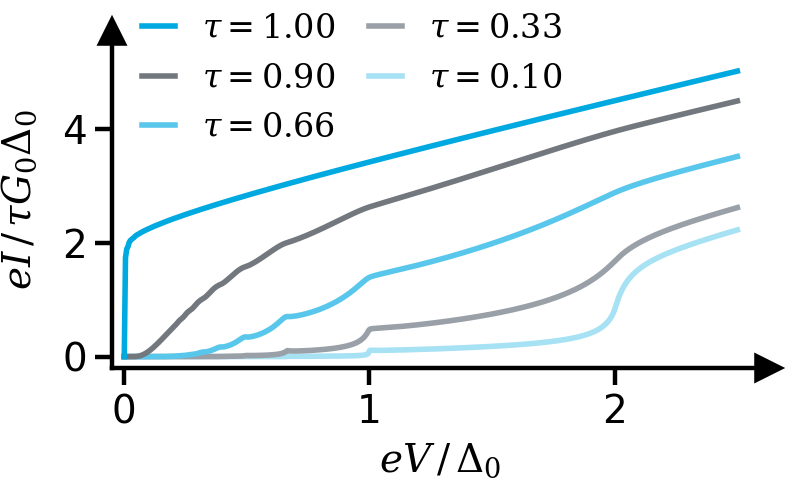

In [104]:
figsize = (2, 1.2)
fig, ax = get_figure(figsize=figsize, subfigure=True)

for i, tau_i in enumerate(tau):
    ax.plot(
        V_mV / Delta_meV,
        I[i, :] / tau_i,
        color=colors[i],
        zorder=10 - i,
        label=f"$\\tau={tau_i:.2f}$",
    )

ylim = ax.get_ylim()
ax.set_ylim(-0.2, 5.7)
ax.set_xlim(-0.05, None)

ax.legend(
    handlelength=1.0,
    loc="upper left",
    frameon=False,
    fontsize=6,
    title_fontsize=6,
    ncols=2,
    columnspacing=1,
    bbox_to_anchor=(0.0, 1.15),
)

ylabel = "$eI\\,/\\,\\tau G_0\\Delta_0$"
xlabel = "$eV\\,/\\,\\Delta_0$"
title = "ha-iv"

theory_layout(fig, ax, title, xlabel, ylabel)

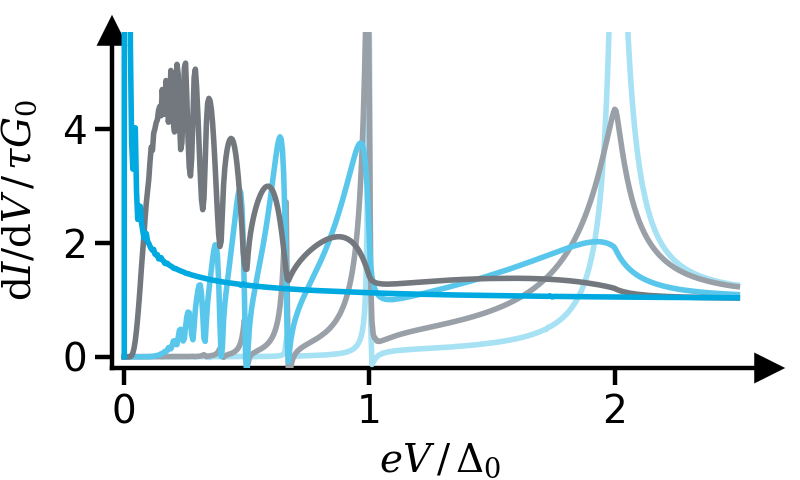

In [105]:
figsize = (2, 1.2)
fig, ax = get_figure(figsize=figsize, subfigure=True)

for i, tau_i in enumerate(tau):
    ax.plot(
        V_mV / Delta_meV,
        dIdV[i, :] / tau_i,
        color=colors[i],
        zorder=10 - i,
        label=f"$\\tau={tau_i:.2f}$",
    )

ylim = ax.get_ylim()
ax.set_ylim(-0.2, 5.7)
ax.set_xlim(-0.05, None)

ylabel = "$\\mathrm{d}I/\\mathrm{d}V\\,/\\,\\tau G_0$"
xlabel = "$eV\\,/\\,\\Delta_0$"
title = "ha-didv"

theory_layout(fig, ax, title, xlabel, ylabel)

# fcs-current

In [17]:
V = np.linspace(0, 3.5, 351)
tau = np.array([0.9, 0.66, 0.33, 0.1])
M = np.arange(1, 11, 1)

I = np.empty((tau.shape[0], V.shape[0], M.shape[0] + 1))
dIdV = np.copy(I)

Delta_meV = 0.180
gamma_meV = 0.0
T_K = 0.0

for i, tau_i in enumerate(tau):
    I[i, :, :] = get_I_nA_fcs(
        V_mV=V * Delta_meV,
        Delta_meV=Delta_meV,
        tau=tau_i,
        T_K=T_K,
        gamma_meV=gamma_meV,
    ) / (tau_i * G_0_muS * Delta_meV)

dIdV = np.gradient(I, V, axis=1)

I[0, 11, 0] = (I[0, 10, 0] + I[0, 13, 0]) / 2
I[0, 12, 0] = (I[0, 11, 0] + I[0, 13, 0]) / 2

cached values: 351/351
cached values: 351/351
cached values: 351/351
cached values: 351/351


/Users/oliver/.pyenv/versions/3.13.3/lib/python3.13/site-packages/colorspacious/ciecam02.py:333: RuntimeWarning: invalid value encountered in divide
  t = (C


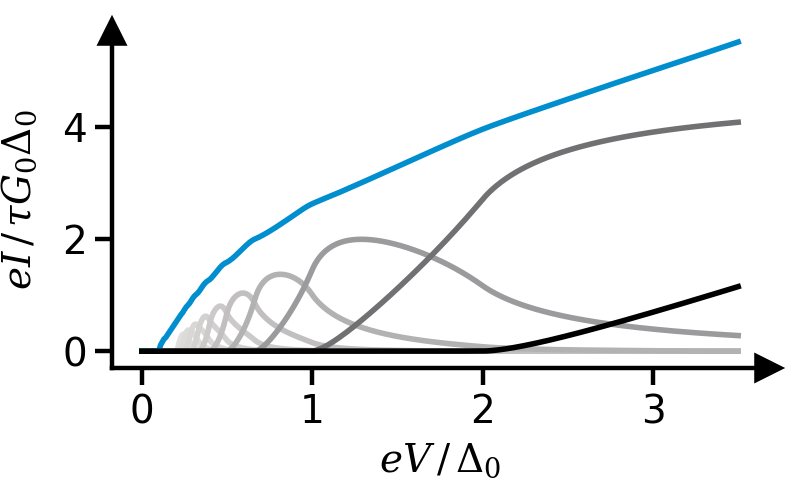

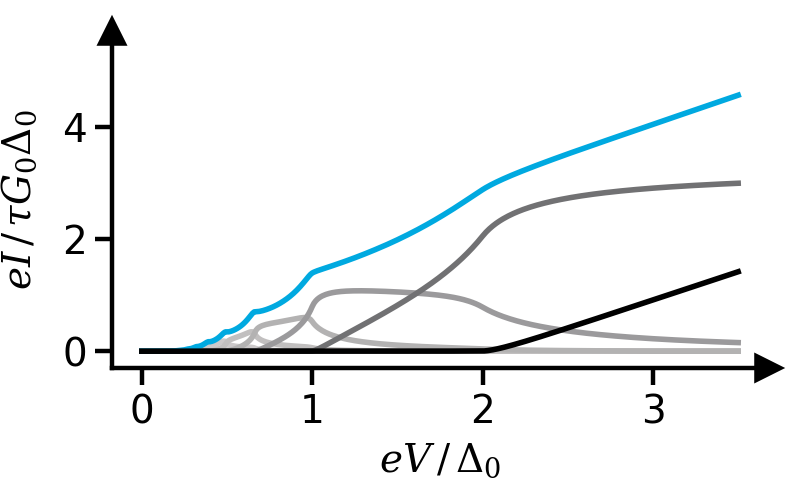

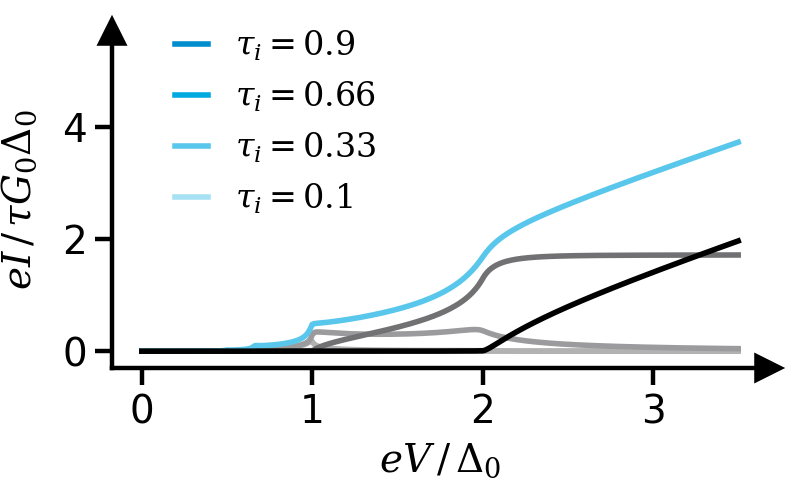

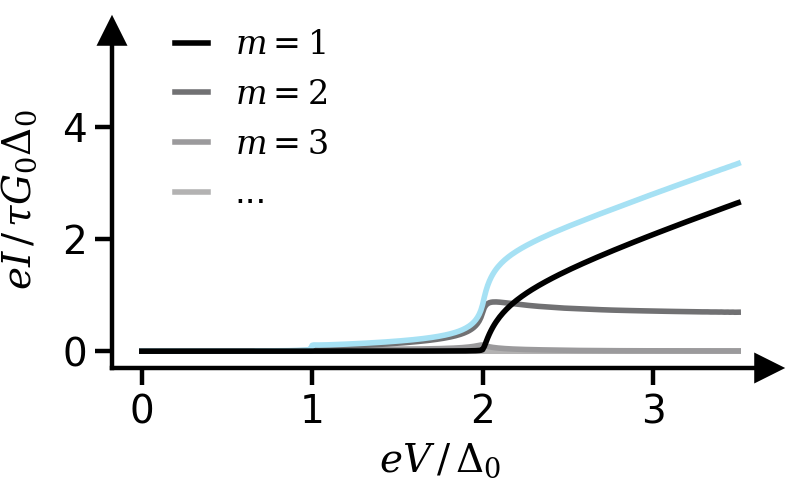

In [18]:
figsize = (2, 1.2)
grey = cmap_tinted_black_to_white(seegrau100)

for i_tau, tau_i in enumerate(tau):

    fig, ax = get_figure(figsize=figsize, subfigure=True)

    ax.plot(
        V,
        I[i_tau, :, 0],
        # color=seeblau100,
        color=seeblau[i_tau],
        zorder=10,
    )

    for i, m in enumerate(M):
        ax.plot(
            V,
            I[i_tau, :, m],
            color=grey(1 - 1 / (i + 1)),
            zorder=10 - i,
            label=f"{m}",
        )

    if tau_i == tau[-1]:
        index = 3
        handles, labels = [], []
        for i, m in enumerate(M[:index]):
            line_handle = Line2D([0], [0], color=grey(1 - 1 / (i + 1)), linestyle="-")
            label = f"$m={m}$"
            handles.append(line_handle)
            labels.append(label)

        line_handle = Line2D([0], [0], color=grey(1 - 1 / (index + 1)), linestyle="-")
        label = f"..."
        handles.append(line_handle)
        labels.append(label)

        ax.legend(
            handles=handles,
            labels=labels,
            handlelength=1.0,
            loc="upper left",
            frameon=False,
            fontsize=6,
            title_fontsize=6,
            ncols=1,
            columnspacing=1.0,
            bbox_to_anchor=(0.05, 1.1),
        )

    if tau_i == tau[-2]:
        handles, labels = [], []
        for ii_tau, tau_ii in enumerate(tau):
            line_handle = Line2D([0], [0], color=seeblau[ii_tau], linestyle="-")
            label = f"$\\tau_i={tau_ii}$"
            handles.append(line_handle)
            labels.append(label)

            ax.legend(
                handles=handles,
                labels=labels,
                handlelength=1.0,
                loc="upper left",
                frameon=False,
                fontsize=6,
                title_fontsize=6,
                ncols=1,
                columnspacing=1.0,
                bbox_to_anchor=(0.05, 1.1),
            )

    ax.set_ylim(-0.3, 5.7)

    ylabel = "$eI\\,/\\,\\tau G_0\\Delta_0$"
    xlabel = "$eV\\,/\\,\\Delta_0$"
    title = f"fcs-{int(tau_i*100):03d}"

    theory_layout(fig, ax, title, xlabel, ylabel)

In [107]:
V1 = np.linspace(0.01, 3.5, 350)
V2 = np.linspace(3.6, 10, 65)
V = np.concatenate((V1, V2))
tau = np.array([0.99, 0.9, 0.8, 0.66])
M = np.arange(1, 11, 1)

I = np.empty((tau.shape[0], V.shape[0], M.shape[0] + 1))
dIdV = np.copy(I)

Delta_meV = 0.180
gamma_meV = 0.0
T_K = 0.0

for i, tau_i in enumerate(tau):
    I1 = get_I_nA_fcs(
        V_mV=V1 * Delta_meV,
        Delta_meV=Delta_meV,
        tau=tau_i,
        T_K=T_K,
        gamma_meV=gamma_meV,
    ) / (G_0_muS * Delta_meV)

    I2 = get_I_nA_fcs(
        V_mV=V2 * Delta_meV,
        Delta_meV=Delta_meV,
        tau=tau_i,
        T_K=T_K,
        gamma_meV=gamma_meV,
    ) / (G_0_muS * Delta_meV)

    dIdV1 = np.gradient(I1, V1, axis=0)
    dIdV2 = np.gradient(I2, V2, axis=0)

    I[i, : len(V1), :] = I1
    I[i, len(V1) :, :] = I2
    dIdV[i, : len(V1), :] = dIdV1
    dIdV[i, len(V1) :, :] = dIdV2

cached values: 351/351
cached values: 101/101
cached values: 351/351
cached values: 101/101
cached values: 351/351
cached values: 101/101
cached values: 351/351
cached values: 101/101


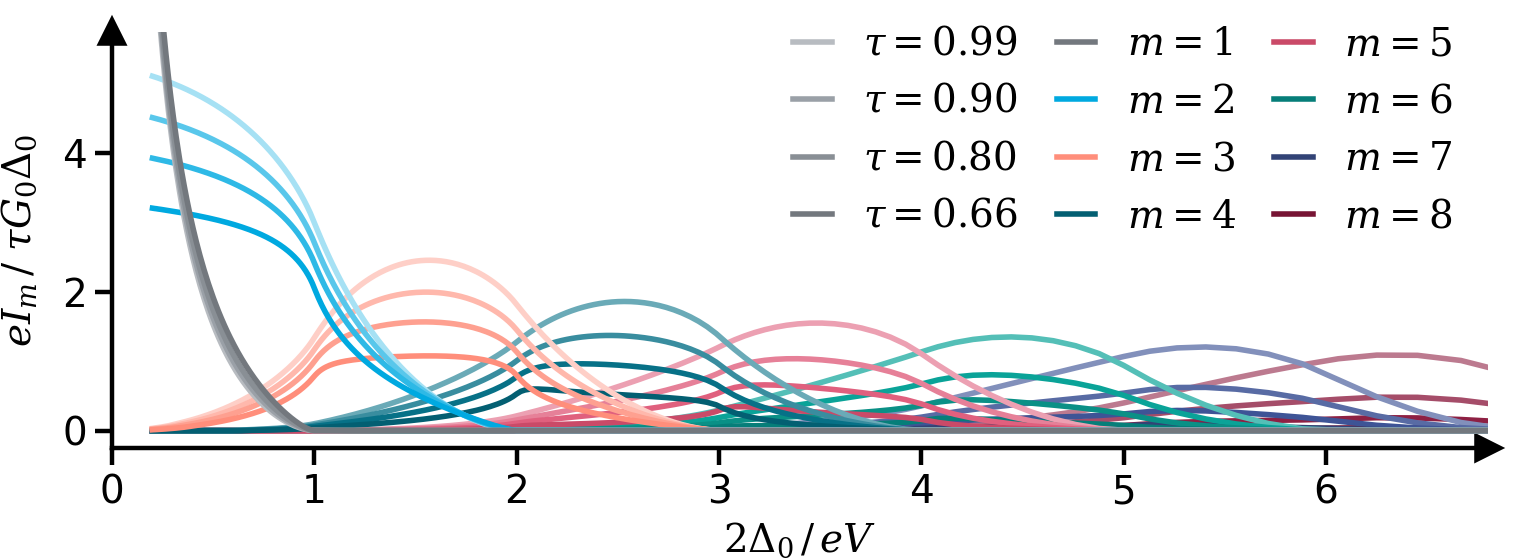

In [ ]:
figsize = (3.8, 1.4)
fig, ax = get_figure(figsize=figsize, subfigure=True)


color_strings = [
    "seegrau",
    "seeblau",
    "peach",
    "petrol",
    "pinky",
    "seegruen",
    "karpfenblau",
    "bordeaux",
    "seeblau",
]
color_shades = ["100", "80", "65", "35", "20"]
permutation = [
    "standard",
    "standard",
    "standard",
    "standard",
    "standard",
    "standard",
    "standard",
    "standard",
    "magenta",
]


M = np.arange(1, 9)

for i_tau, tau_i in enumerate(tau):
    if i_tau < 4:
        for i_m, m in enumerate(M):
            ax.plot(
                2 / V,
                I[i_tau, :, m] / tau_i,
                color=get_color(
                    palette=color_strings[i_m],
                    shade=3 - i_tau,
                    permutation=permutation[i_m],
                ),
                zorder=i_tau + (10 - i_m) * 10,
            )

handles, labels = [], []
for i_tau, tau_i in enumerate(tau):
    line_handle = Line2D(
        [0], [0], color=get_color(palette="seegrau", shade=3 - i_tau), linestyle="-"
    )
    label = f"$\\tau={tau_i:.2f}$"
    handles.append(line_handle)
    labels.append(label)

for i_m, m in enumerate(M):
    line_handle = Line2D(
        [0], [0], color=get_color(palette=color_strings[i_m], shade=0), linestyle="-"
    )
    label = f"$m={m}$"
    handles.append(line_handle)
    labels.append(label)

ax.legend(
    handles=handles,
    labels=labels,
    handlelength=1.0,
    loc="upper right",
    frameon=False,
    fontsize=7,
    title_fontsize=7,
    ncols=3,
    columnspacing=1.0,
    bbox_to_anchor=(1.0, 1.1),
)


ax.set_xlim(0, 6.8)
ax.set_ylim(-0.25, 5.75)

# ax.set_xticks([1, 3, 5, 7])
xlabel = "$2\\Delta_0\\,/\\,eV$"

ylabel = "$eI\\,/\\,\\, \\tau G_0\\Delta_0$"
title = f"fcs-iv-m-inv"

theory_layout(fig, ax, title, xlabel, ylabel)

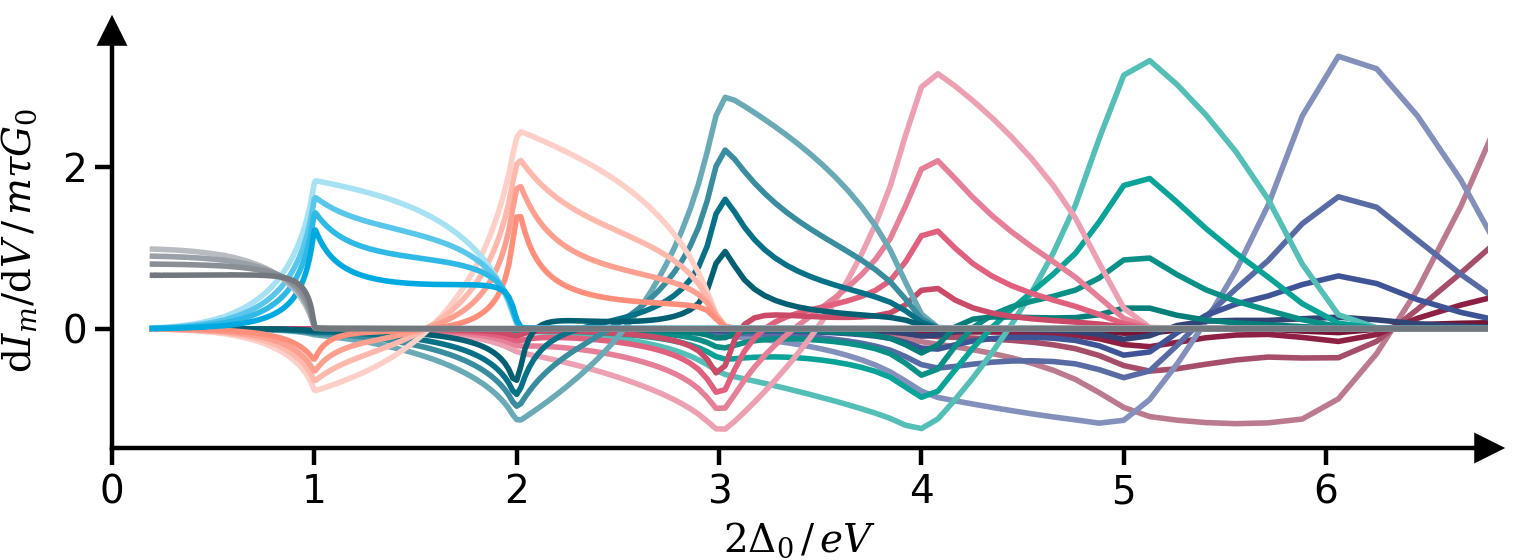

In [ ]:
figsize = (3.8, 1.4)
fig, ax = get_figure(figsize=figsize, subfigure=True)

for i_tau, tau_i in enumerate(tau):
    if i_tau < 4:
        for i_m, m in enumerate(M):
            ax.plot(
                2 / V,
                dIdV[i_tau, :, m] / m,
                color=get_color(
                    palette=color_strings[i_m],
                    shade=3 - i_tau,
                    permutation=permutation[i_m],
                ),
                zorder=i_tau + (10 - i_m) * 10,
            )

ax.set_xlim(0, 6.8)
# ax.set_ylim(-10, 20)

# ax.set_xticks([1, 3, 5, 7])
xlabel = "$2\\Delta_0\\,/\\,eV$"

ylabel = "$\\mathrm{d}I/\\mathrm{d}V\\,/\\,m\\tau G_0$"
title = f"fcs-didv-m-inv"

theory_layout(fig, ax, title, xlabel, ylabel)